### `Name : Berchmans Kevin S`

## `PDL - Text Classification using CNN-LSTM and Pre-trained Glove Models`

In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import sklearn
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing. text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.optimizers import RMSprop , Adam
from keras.models import Sequential
from keras.layers import *
from nltk.corpus import stopwords 

nltk.download('stopwords') 
",".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\online\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("glove.csv")
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
data.shape

(2225, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [6]:
data.shape

(2225, 2)

In [7]:
y =data['category'] 
X=[] 
for review in data['text']: 
    filtered_sentence = [w.lower() for w in review.split() if not w in STOPWORDS ] 
    X.append(filtered_sentence)
X = pd.Series(X) 

In [8]:
y_tokenizer = Tokenizer() 
y_tokenizer.fit_on_texts(y) 
y_seq = np.array(y_tokenizer.texts_to_sequences (y))

In [9]:
X_token = Tokenizer(num_words=5000,oov_token='<oov>') 
X_token.fit_on_texts(X) 
word_index = X_token.word_index
X_sequence = X_token.texts_to_sequences(X) 
dict(list(word_index.items())[0:15])

{'<oov>': 1,
 'said': 2,
 '-': 3,
 'mr': 4,
 'would': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'said.': 12,
 'year': 13,
 'last': 14,
 'first': 15}

In [10]:
X_padding= pad_sequences(X_sequence, maxlen=200, padding='post') 

In [11]:
print(y_seq.shape) 
print(X_padding.shape) 

(2225, 1)
(2225, 200)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(X_padding, y_seq,train_size=0.7)

In [13]:
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

(1557, 200) (668, 200)
(1557, 1) (668, 1)


In [14]:
vocab_size = 5000 
embedding_dim = 64 
max_length = 200

In [15]:
model1 = Sequential() 
model1.add(Embedding(vocab_size, embedding_dim)) 
model1.add(LSTM(embedding_dim))
model1.add(Dense(embedding_dim, activation='tanh'))
model1.add(Dense(6,activation='softmax'))

In [16]:
model1. summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 357,574
Trainable params: 357,574
Non-trainable params: 0
_________________________________________________________________


In [17]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history1 = model1.fit(x_train,y_train, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
39/39 - 3s - loss: 1.6391 - accuracy: 0.2562 - val_loss: 1.5447 - val_accuracy: 0.3429 - 3s/epoch - 75ms/step
Epoch 2/20
39/39 - 1s - loss: 1.4532 - accuracy: 0.3341 - val_loss: 1.4073 - val_accuracy: 0.3814 - 1s/epoch - 33ms/step
Epoch 3/20
39/39 - 1s - loss: 1.5570 - accuracy: 0.3044 - val_loss: 1.5324 - val_accuracy: 0.3173 - 1s/epoch - 32ms/step
Epoch 4/20
39/39 - 1s - loss: 1.3823 - accuracy: 0.4088 - val_loss: 1.5277 - val_accuracy: 0.4263 - 1s/epoch - 33ms/step
Epoch 5/20
39/39 - 1s - loss: 1.2562 - accuracy: 0.4096 - val_loss: 1.2656 - val_accuracy: 0.4071 - 1s/epoch - 33ms/step
Epoch 6/20
39/39 - 1s - loss: 1.1564 - accuracy: 0.4169 - val_loss: 1.4300 - val_accuracy: 0.4167 - 1s/epoch - 32ms/step
Epoch 7/20
39/39 - 1s - loss: 1.3379 - accuracy: 0.4434 - val_loss: 1.3812 - val_accuracy: 0.4487 - 1s/epoch - 33ms/step
Epoch 8/20
39/39 - 1s - loss: 1.1260 - accuracy: 0.5157 - val_loss: 1.2361 - val_accuracy: 0.4647 - 1s/epoch - 32ms/step
Epoch 9/20
39/39 - 1s - loss: 1.

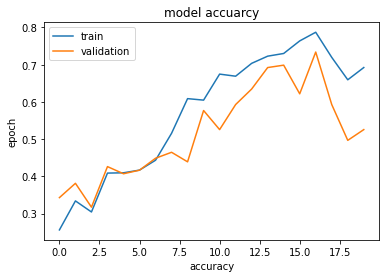

In [19]:
plt.plot(history1.history['accuracy']) 
plt.plot(history1.history['val_accuracy'])
plt.title('model accuarcy') 
plt.xlabel('accuracy') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation'])
plt.show()

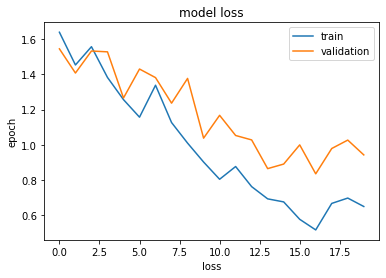

In [20]:
plt.plot(history1.history['loss']) 
plt.plot(history1.history['val_loss'])

plt.title('model loss') 
plt.xlabel('loss') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation'])
plt.show() 

In [21]:
print("loss: ", model1.evaluate(x_test,y_test, verbose=0)[0]) 
print("accuarcy: ", model1.evaluate(x_test, y_test, verbose=0)[1]) 

loss:  0.9804655313491821
accuarcy:  0.5179640650749207


In [22]:
model2 = Sequential() 
model2.add(Embedding(vocab_size, embedding_dim)) 
model2.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu'))
model2.add(MaxPooling1D((2))) 
model2.add(LSTM(embedding_dim)) 
model2.add(Dense(128, activation= 'relu'))
model2.add(Dense(6, activation='softmax')) 


In [23]:
model2. summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          10272     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [24]:
model2.compile (optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history2 = model2.fit(x_train,y_train, epochs=20,validation_split=0.2, verbose=2) 

Epoch 1/20
39/39 - 3s - loss: 1.6388 - accuracy: 0.2602 - val_loss: 1.5533 - val_accuracy: 0.2500 - 3s/epoch - 67ms/step
Epoch 2/20
39/39 - 1s - loss: 1.3710 - accuracy: 0.3695 - val_loss: 1.2727 - val_accuracy: 0.4776 - 909ms/epoch - 23ms/step
Epoch 3/20
39/39 - 1s - loss: 1.1266 - accuracy: 0.4522 - val_loss: 1.1606 - val_accuracy: 0.4038 - 926ms/epoch - 24ms/step
Epoch 4/20
39/39 - 1s - loss: 0.9664 - accuracy: 0.5542 - val_loss: 0.9326 - val_accuracy: 0.5705 - 902ms/epoch - 23ms/step
Epoch 5/20
39/39 - 1s - loss: 0.7505 - accuracy: 0.6859 - val_loss: 0.9467 - val_accuracy: 0.5929 - 917ms/epoch - 24ms/step
Epoch 6/20
39/39 - 1s - loss: 0.5841 - accuracy: 0.7406 - val_loss: 0.7887 - val_accuracy: 0.6955 - 930ms/epoch - 24ms/step
Epoch 7/20
39/39 - 1s - loss: 0.3970 - accuracy: 0.8329 - val_loss: 0.7926 - val_accuracy: 0.7115 - 918ms/epoch - 24ms/step
Epoch 8/20
39/39 - 1s - loss: 0.3034 - accuracy: 0.9092 - val_loss: 0.7491 - val_accuracy: 0.7756 - 930ms/epoch - 24ms/step
Epoch 9/20


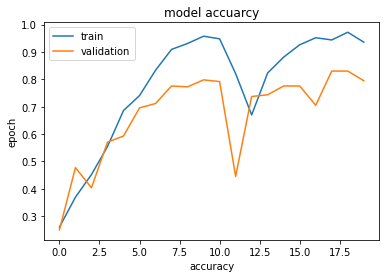

In [29]:
plt.plot(history2.history['accuracy']) 
plt.plot(history2.history['val_accuracy']) 
plt.title('model accuarcy') 
plt.xlabel('accuracy') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation'])
plt.show() 

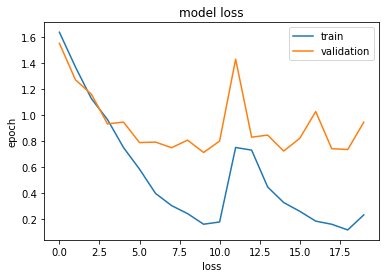

In [30]:
plt.plot(history2.history['loss']) 
plt.plot(history2.history['val_loss']) 
plt.title('model loss')
plt.xlabel('loss') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation']) 
plt.show() 


In [31]:
score = model2.evaluate(x_test,y_test,verbose=0) 
print("loss: ", score[0]) 
print("accuracy: ", score[1])

loss:  0.8841361999511719
accuracy:  0.7829341292381287
